In [57]:
import pandas as pd
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
import re
from gensim.models import Word2Vec
import numpy as np
from sklearn.manifold import TSNE

In [58]:
data=pd.read_csv("scisumm.csv"
                 ,nrows=201)
data.head()

,text,summary
0,TnT - A Statistical Part-Of-Speech Tagger Trig...,TnT - A Statistical Part-Of-Speech Tagger\nTri...
1,Mildly Non-Projective Dependency Structures Sy...,Mildly Non-Projective Dependency Structures\nS...
2,Using Corpus Statistics And WordNet Relations ...,Using Corpus Statistics And WordNet Relations ...
3,Automatic Labeling Of Semantic Roles present a...,Automatic Labeling Of Semantic Roles\nWe prese...
4,Generative Models For Statistical Parsing With...,Generative Models For Statistical Parsing With...


In [59]:
stop_words = set(stopwords.words('english'))
def TextCleaning(text,num):
    text = text.lower()
    #cleantext = re.sub("\(.*?\)", '', text)
    cleantext = re.sub("[0-9]", '', text)
    cleantext = re.sub("(\.\.+)", ' ',cleantext)
    cleantext = re.sub("(--+)", ' ',cleantext)
    cleantext = re.sub("(~~+)", ' ',cleantext)
    cleantext = re.sub("[<>()|&©ø\[\]\'\";~*]", ' ',cleantext)
    cleantext = re.sub("(\+\++)", ' ',cleantext)
    cleantext = re.sub("(__+)", ' ',cleantext)
    cleantext = re.sub("e.g.", '',cleantext)
    cleantext = re.sub("i.e.,", '',cleantext)
    cleantext = re.sub("acc.", '',cleantext)
    #cleantext = re.sub("[^a-zA-Z]", ' ',cleantext)
    cleantext = re.sub("(\s+)",' ',cleantext)
    if(num==0):
        tokens = [w for w in cleantext.split() if not w in stop_words]
    else:
        tokens=cleantext.split()
    long_words=[]
    for i in tokens:
        if len(i)>2:                                              
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [60]:
cleaned_text = []
for t in data['text']:
    cleaned_text.append(TextCleaning(t,2)) 
#call the function
cleaned_summary = []
for t in data['summary']:
    cleaned_summary.append(TextCleaning(t,0))
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data.dropna(axis=0,inplace=True)
data.iloc[[0],[2]]

,cleaned_text
0,tnt statistical part-of-speech tagger trigrams...


In [61]:
data.iloc[[0],[3]]

,cleaned_summary
0,tnt statistical part-of-speech tagger trigrams...


In [62]:
import nltk
nltk.download('punkt')   # one time execution
from nltk.tokenize import sent_tokenize
sentence = sent_tokenize(data.loc[0,'cleaned_text'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cll48\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
corpus = []
for i in range(len(sentence)):
    #sen = re.sub(' ', " ", sentence[i])
    sen = sentence[i]
    #sen = sen.lower()                            
    sen = sen.split()                         
    sen = ' '.join([i for i in sen ])  #if i not in stopwords.words('english') 
    corpus.append(sen)

In [64]:
all_words = [i.split() for i in sentence]
model = Word2Vec(all_words, min_count=1,vector_size= 700)

In [65]:
sent_vector=[]
for i in corpus:
    
    plus=0
    for j in i.split():
        plus+= model.wv[j]
    plus = plus/len(i.split())
    
    sent_vector.append(plus)

In [66]:
import numpy as np
from sklearn.cluster import KMeans

wcss=[]
n_clusters = 8
kmeans = KMeans(n_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(sent_vector)

In [67]:
print(y_kmeans)

[4 1 1 6 4 4 6 4 6 6 1 1 6 6 6 6 6 1 6 6 6 6 1 1 1 4 1 4 2 5 6 6 1 1 1 1 4
 6 1 6 1 4 4 4 4 0 6 6 6 6 1 6 1 6 1 5 1 6 6 6 4 6 6 6 4 1 1 4 1 4 1 1 1 1
 6 6 1 6 6 6 1 6 1 1 6 1 6 1 6 6 4 6 4 1 4 6 1 6 1 4 1 1 6 6 4 3 1 1 1 6 1
 6 6 6 6 1 6 6 1 6 6 6 4 1 3 6 6 6 1 1 4 6 1 1 6 7 6 6 4 1 6 6 1 6 1 1 6 1
 1 6 1 6 1]


In [34]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in list(model.wv.index_to_key):
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\cll48\anaconda3\envs\Python_3_8\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\cll48\anaconda3\envs\Python_3_8\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


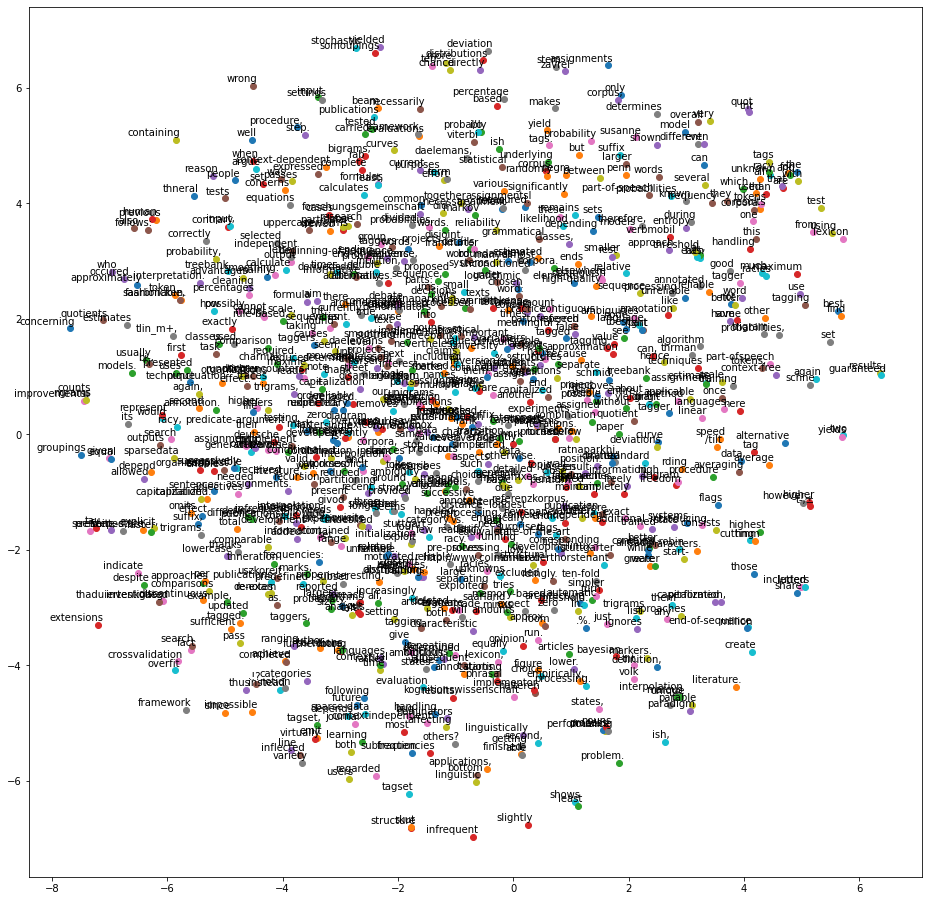

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
tsne_plot(model)

In [25]:
from scipy.spatial import distance
my_list=[]
for i in range(n_clusters):
    my_dict={}
    
    for j in range(len(y_kmeans)):
        
        if y_kmeans[j]==i:
            my_dict[j] =  distance.euclidean(kmeans.cluster_centers_[i],sent_vector[j])
    min_distance = min(my_dict.values())
    my_list.append(min(my_dict, key=my_dict.get))

summary3 = ''               
for i in sorted(my_list):
    summ = sentence[i]
    summary3 += summ
    print(sentence[i])
    

token.
transition and output probabilities are estimated from tagged corpus.
somoupings even yielded worse results.
use context-independent approach for did for the contextual wts turned out good choice set all the standard deviation the unconditioned maximum likelihood probabilities the tags the training corpus, set for all using tagset tags and the average this usually yields values the range use different estimates for uppercase and lowercase words, maintain two different suffix tries depending the capitalization the word.
second, learning curves are presented, that indicate the performance when using training corpora different starting with few tokens and ranging the size the entire corpus minus the test set important characteristic statistical taggers that they not only assign tags words but also probabilities order rank different assignments.
thrman negra corpus consists sentences tokens newspaper texts frankfurter rundschau that are annotated with parts-ofspeech and predicate-ar

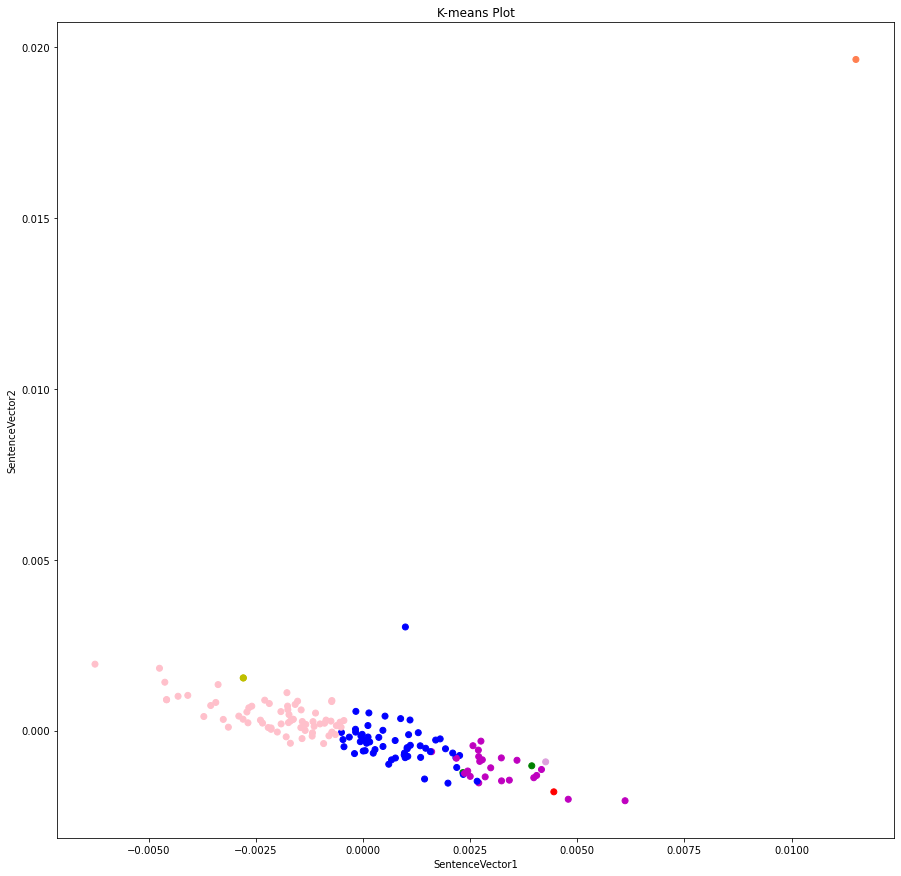

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(sent_vector)

colors = ["r", "b", "coral", "y", "m" ,"g","pink","plum"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(15,15))
plt.xlabel('SentenceVector1') 
plt.ylabel('SentenceVector2') 
plt.title("K-means Plot")

ax.scatter(x_axis, y_axis, c=[colors[d] for d in y_kmeans])
plt.savefig("W2VKMeans.png")
#for i, txt in enumerate(corpus):
 #   ax.annotate(txt, (x_axis[i], y_axis[i]))

In [31]:
from rouge_score import rouge_scorer

reference = data.loc[0,'cleaned_summary']

hypotheses = str(summary3)
reference = str(reference)

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(hypotheses,
                      reference)
print(hypotheses)
print("____________________")
print(reference)
print(scores)

token.transition and output probabilities are estimated from tagged corpus.somoupings even yielded worse results.use context-independent approach for did for the contextual wts turned out good choice set all the standard deviation the unconditioned maximum likelihood probabilities the tags the training corpus, set for all using tagset tags and the average this usually yields values the range use different estimates for uppercase and lowercase words, maintain two different suffix tries depending the capitalization the word.second, learning curves are presented, that indicate the performance when using training corpora different starting with few tokens and ranging the size the entire corpus minus the test set important characteristic statistical taggers that they not only assign tags words but also probabilities order rank different assignments.thrman negra corpus consists sentences tokens newspaper texts frankfurter rundschau that are annotated with parts-ofspeech and predicate-argumen

In [33]:
allsum3 = []
for text in data['cleaned_text']:
    sentence = sent_tokenize(text)
    corpus = []
    for i in range(len(sentence)):
        sen = re.sub(' ', " ", sentence[i])  
        sen = sen.lower()                            
        sen = sen.split()                         
        sen = ' '.join([i for i in sen ])  #if i not in stopwords.words('english') 
        corpus.append(sen)
    
    all_words = [i.split() for i in sentence]
    model = Word2Vec(all_words, min_count=1,vector_size= 700)
    sent_vector=[]
    for i in corpus:
    
        plus=0
        for j in i.split():
            plus+= model.wv[j]
        plus = plus/len(i.split())
    
        sent_vector.append(plus)
    wcss=[]
    n_clusters = 3
    kmeans = KMeans(n_clusters, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(sent_vector)    
    my_list=[]
    for i in range(n_clusters):
        my_dict={}
    
        for j in range(len(y_kmeans)):
        
            if y_kmeans[j]==i:
                my_dict[j] =  distance.euclidean(kmeans.cluster_centers_[i],sent_vector[j])
        min_distance = min(my_dict.values())
        my_list.append(min(my_dict, key=my_dict.get))

    summary3 = ''               
    for i in sorted(my_list):
        summ = sentence[i]
        summary3 += summ
    allsum3.append(summary3)

In [35]:
data["result"] = allsum3

In [37]:
allsum3[1]

'however, recent results non-projective dependency parsing, especially using data-driven methods, indicate that most non-projective structures required for the analysis natural language are very nearly projective, differing only minimally from the best projective approximation nivre and nilsson, hall and novák, mcdonald and pereira, this raises the question whether possible characterize class mildly non-projective dependency structures that rich enough unt for naturally occurring syntactic constructions, yet restricted enough enable efficient parsing.bodirsky al.the fundamental difference between gap degree and degree that thp degree measures the number discontinuities within subtree, while the degree measures the number intervening constituents spanned single this difference illustrated thaphs displayed figure graph has gap degree but degree the subtree rooted node marked the solid has two gaps, but each its only spans one connected component not dominated marked the squares contrast,

In [36]:
from rouge_score import rouge_scorer

reference = data['cleaned_summary']
hypotheses = data["result"]

hypotheses = str(hypotheses)
reference = str(reference)

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
scores = scorer.score(hypotheses,
                      reference)
print(hypotheses)
print("____________________")
print(reference)
print(scores)

0      recent comparisons approaches that can trained...
1      however, recent results non-projective depende...
2      corpus-based approaches that use only word coo...
3      when the automatically identified constituents...
4      ccg grammars are characterized much larger cat...
                             ...                        
196    this paper, use one such machine learning tech...
197    systems.furthermore, the distribution labels t...
198    this not surprising given the typical inter-an...
199    japanese dependency structure analysis based s...
200    ish.more recently developed hier archical syst...
Name: result, Length: 201, dtype: object
____________________
0      tnt statistical part-of-speech tagger trigrams...
1      mildly non-projective dependency structures sy...
2      using corpus statistics wordnet relations sens...
3      automatic labeling semantic roles present syst...
4      generative models statistical parsing combinat...
                          